## Sarima Models 

This Sarima model will be using the 1 year hourly dataset.  This dataset has 8731 Data points compared to about 550 in the previous model.  I expect this new data to have much better results

In [21]:
import pandas as pd
from pandas.plotting import lag_plot
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from statsmodels.tsa.stattools import acovf,acf,pacf,pacf_yw,pacf_ols, adfuller
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

In [5]:
# Importing the Dataframe
df = pd.read_csv('df_pt.csv')
df.drop('Unnamed: 0', axis = 1, inplace=True)
df['ds'] = pd.to_datetime(df['ds'])
df.set_index('ds', inplace=True, )
df.columns = ['power']
df.fillna(1353772, inplace=True)
df.index.freq = '1H'

In [24]:
df.head()

,power
ds,
2018-11-14 14:17:00,1580461.625
2018-11-14 15:17:00,2057284.438
2018-11-14 16:17:00,1567539.813
2018-11-14 17:17:00,1446398.438
2018-11-14 18:17:00,1584766.063


### Testing for Seasonality 

In [12]:
result = adfuller(df['power'].dropna(),autolag='AIC')
print('ADF Statistic: ', result[0])
print('p-value: ',  result[1])

ADF Statistic:  -7.504842779756211
p-value:  4.160854213927059e-11


#### Data is stationary

## Auto Regression¶

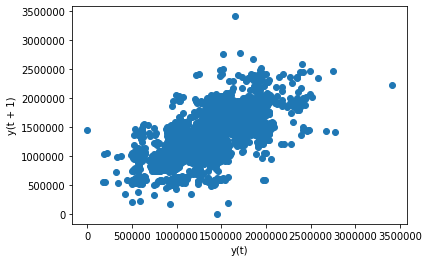

In [16]:
# Slight Positive Correlation
lag_plot(df['power'])

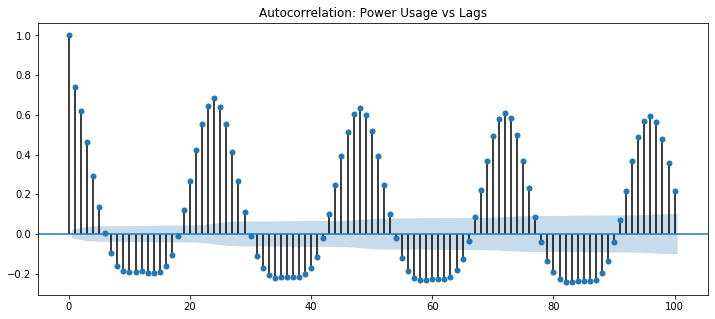

In [22]:
title = 'Autocorrelation: Power Usage vs Lags'
lags = 100
fig, ax = plt.subplots(figsize=(12,5))
plot_acf(df['power'],title=title,lags=lags, ax=ax);

#### Can clearly see in the above Autocorrelation plot that every 24th lag there is a high correlation.  This is expected since every cycle is 24 hours. 

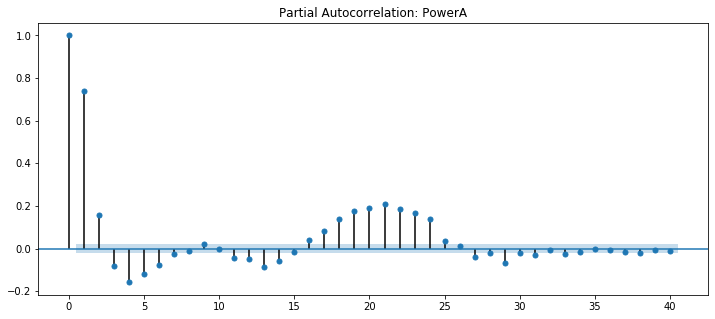

In [25]:
title='Partial Autocorrelation: PowerA'
lags=40
fig, ax = plt.subplots(figsize=(12,5))
plot_pacf(df['power'],title=title,lags=lags, ax=ax);